# Neural Networks & Intelligent Computer Systems | 1st Assignment
Team ΜΒ-24 | Big Dataset B04

# Section A: Our Team

<table align="left">
    <tr align="left"><th>Surname</th><th>Name</th><th>Student ID</th></tr>
    <tr><td>Korkovili</td><td>Ioanna</td><td>03115078</td></tr>
    <tr><td>Xanthi</td><td>Eleni</td><td>03115054</td></tr>
    <tr><td>Tsagkarakis</td><td>Stylianos</td><td>03115180</td></tr>
</table>

# Section B: Introduction to the dataset




**Spambase Data Set**

The dataset describes the analysis of spam and non-spam emails collected. The collection of spam e-mails came from a postmaster and individuals who had filed spam. The collection of non-spam e-mails came from filed work and personal e-mails. This data is useful when constructing a personalized spam filter.

The dataset includes 4601 samples and 57 features indicating whether a particular word or character was frequently occuring in the e-mail. 3 of these features measure the length of sequences of consecutive capital letters. The last column denotes whether the e-mail was considered spam (1) or not (0), the labels of our dataset.






### Upgrade hosted runtime

In [176]:
!pip install --upgrade pip           #upgrade pip package installer
!pip install --upgrade scikit-learn  #upgrade scikit-learn package
!pip install --upgrade numpy         #upgrade numpy package
!pip install --upgrade pandas        #upgrade #upgrade pandas package
!pip install --upgrade joblib
!pip install --upgrade imbalanced-learn

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (19.3.1)
Requirement already up-to-date: scikit-learn in /usr/local/lib/python3.6/dist-packages (0.22)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.17.4)
Requirement already up-to-date: pandas in /usr/local/lib/python3.6/dist-packages (0.25.3)
Requirement already up-to-date: joblib in /usr/local/lib/python3.6/dist-packages (0.14.1)
Requirement already up-to-date: imbalanced-learn in /usr/local/lib/python3.6/dist-packages (0.6.1)


### Retrieve dataset

In [177]:
import pandas as pd
import numpy as np
import ast
import io
import requests
import matplotlib.pyplot as plt
from urllib.error import HTTPError

# datafile = "spambase.data"

try:
    #data without headers for better manipulation
    spambase_data_url = "https://raw.githubusercontent.com/steliostss/neural_networks_ntua/master/ex1/spambase.data?token=AH57CIML4NIAJZOJQUFI4UC576BI6&fbclid=IwAR11mbVCzpQQNxrDLhIvej6j7hfB43R4hoczCCOQ97eme5kfIaBlUMY73wY"
    data = pd.read_csv(spambase_data_url, header=None)

    #data with headers for better visualizing
    #data_headers = pd.read_csv(data_csv_url)

    print("Succesful file processing!")

except HTTPError:
    print("URL not working.")


Succesful file processing!


### Printing for validation / visualization

In [178]:
#print for better visualization
data.head(6)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


### Custom functions

In [0]:
## GATHER ALL FUNCTIONS FOR SECTION-B HERE

# evaluate type of value in the given variable
def tryeval(np_samples):
    for row in range(len(np_samples)): 
        for col in range(len(np_samples[row])):
            try: 
                np_samples[row][col] = ast.literal_eval(np_samples[row][col])
            except ValueError:
                pass
    return np_samples

# define if all features have the same type
def features_datatypes(features):
    datatypes = list()
    for row in range(len(features)):
        for col in range(len(np_samples[row])):
            current_type = type(features[row][col])
            if current_type not in datatypes:
                datatypes.append(current_type)
    return datatypes

# define all class labels
def class_labels(labels):
    cLabels = [] # all the labels gathered
    for col in range(len(labels)):
        current_val = labels[col]
        if current_val not in cLabels:
            cLabels.append(current_val)
    return cLabels

### Manage datafile, get desired data

Get #features, #samples, type of features

In [274]:
# gather data features in a table
data_features = data.iloc[[0],:-1]
( _ , number_of_features ) = data_features.shape
print("Q2: Number of features = ", number_of_features)
# print(data_features.shape) # uncomment if you want to check the results

# gather data samples in a table
data_samples = data.iloc[0:,:-1]
( number_of_samples , _ ) = data_samples.shape
print("Q2: Number of samples = ", number_of_samples)
# print(data_samples.shape) # uncomment if you want to check the results

# transform the gathered data in numpy arrays
np_features = data_features.values
np_samples = data_samples.values

# convert the type of samples to the correct type
np_samples = tryeval(np_samples)
datatypes = features_datatypes(np_samples)


print("Q2: Type of features =", end=' ')
print(*datatypes, sep = " & ")

Q2: Number of features =  57
Q2: Number of samples =  4601
Q2: Type of features = <class 'numpy.float64'>


- Q3: There are no headers in the first line

- Q3: There is no line numbering

In [275]:
# gather class labels in a table

binary_class_labels = data.iloc[:, 57] 
np_labels = binary_class_labels.values.flatten()

np_labels

array([1, 1, 1, ..., 0, 0, 0])

### Classification Labels

In [276]:
# make a list with all different labels
list_of_labels = class_labels(np_labels)
print("Q4: Classification Labels =", end=' ')
print(*list_of_labels, sep = " & ")

label_names = list()
for i in range(len(list_of_labels)):
    label_names.append(str(list_of_labels[i]))
# label_names = ('0','1')
label_names

Q4: Classification Labels = 1 & 0


['1', '0']

- Q5: There was no modification on the data.

### Check Empty dataset

In [183]:
# check if dataset has empty values
# and if, how many of them

!echo "For spambase.data file, empty values: "
!cat spambase.data | grep "?" | wc -l

For spambase.data file, empty values: 
cat: spambase.data: No such file or directory
0


### Label frequencies

In [184]:
print("frequencies:", np.bincount(np_labels))
freq = np.bincount(np_labels)
for i in range(len(freq)):
    print("For label:", i, "percentage is", "{:.2%}".format(freq[i]/number_of_samples))

frequencies: [2788 1813]
For label: 0 percentage is 60.60%
For label: 1 percentage is 39.40%


Our dataset is not balanced which is visible in the frequences above.
We will use the oversampling process in order to ensure we do not miss any information.

### Split to test and train set

In [0]:
from sklearn.linear_model import LogisticRegression 
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import confusion_matrix, classification_report 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE

In [0]:
from sklearn.model_selection import train_test_split

# Split our data
train, test, train_labels, test_labels = train_test_split(np_samples, 
                                                          np_labels, 
                                                          test_size=0.3)

# Section C: Baseline Classification

### Custom Functions

In [0]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt
import time

def print_precision_recall_fscore_support(method, test_labels, pred, label_names):
    print(method, end = '\n\n')
    (none, micro, macro, weighted) = get_PRFS(method, test_labels, pred, label_names)
    print("none     :", none )
    print("micro    :", micro )
    print("macro    :", macro )
    print("weighted :", weighted, end = '\n\n')
    print(classification_report(test_labels, pred, target_names=label_names), end = '\n\n')

    ( _ , _ , microF1    , _ ) = micro
    ( _ , _ , macroF1    , _ ) = macro
    ( _ , _ , weightedF1 , _ ) = weighted

    barplotF1 = (microF1, macroF1, weightedF1)
    xaxis = ("microF1", "macroF1", "weightedF1")
    plt.figure(figsize=(10,5))
    plt.bar(xaxis, barplotF1)
    plt.show()
    print("---------------------------------------------------------------------------------------------------------------------", end = '\n')
    print("---------------------------------------------------------------------------------------------------------------------", end = '\n\n')

# get_precision_recall_fscore_support
def get_PRFS(method, test_labels, pred, label_names):
    none = precision_recall_fscore_support(test_labels, pred, average=None)
    micro = precision_recall_fscore_support(test_labels, pred, average='micro')
    macro = precision_recall_fscore_support(test_labels, pred, average='macro')
    weighted = precision_recall_fscore_support(test_labels, pred, average='weighted')
    return (none, micro, macro, weighted)

In [0]:
# We will use the below dictionaries to compare the results of each classifier
f1_macro_default={}
f1_macro_optimized={}

f1_micro_default={}
f1_micro_optimized={}

train_time_default={}
train_time_optimized={}

predict_time_default={}
predict_time_optimized={}

### Dummy Classifier

In [0]:
from sklearn.dummy import DummyClassifier
dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")

In [283]:
# με τη μέθοδο fit "εκπαιδεύουμε" τον ταξινομητή στο σύνολο εκπαίδευσης (τα χαρακτηριστικά και τις ετικέτες τους)
from sklearn.metrics import accuracy_score

# με τη μέθοδο predict παράγουμε προβλέψεις για τα δεδομένα ελέγχου (είσοδος τα χαρακτηριστικά μόνο)
predictions = {}
spambase_accuracy = {}

model = dc_uniform.fit(train, train_labels)
preds = dc_uniform.predict(test)
predictions['dc_uniform'] = preds
spambase_accuracy['uniform (random)'] = accuracy_score(test_labels, preds)


model = dc_constant_0.fit(train, train_labels)
preds = dc_constant_0.predict(test)
predictions['dc_constant_0'] = preds
spambase_accuracy['constant 0'] = accuracy_score(test_labels, preds)

model = dc_constant_1.fit(train, train_labels)
preds = dc_constant_1.predict(test)
predictions['dc_constant_1'] = preds
spambase_accuracy['constant 1'] = accuracy_score(test_labels, preds)

model = dc_most_frequent.fit(train, train_labels)
preds = dc_most_frequent.predict(test)
predictions['dc_most_frequent'] = preds
spambase_accuracy['most frequent label'] = accuracy_score(test_labels, preds)

start_time = time.time()
model = dc_stratified.fit(train, train_labels)
train_time = (time.time() - start_time)

train_time_default['Dummy'] = train_time
train_time_optimized['Dummy'] = train_time

start_time = time.time()
preds = dc_stratified.predict(test)
predictions['dc_stratified'] = preds
spambase_accuracy['stratified'] = accuracy_score(test_labels, preds)
pred_time = (time.time() - start_time)

predict_time_default['Dummy'] = train_time
predict_time_optimized['Dummy'] = train_time

for i in predictions:
    print("Prediction for", i, '=', predictions[i])

print()
    
print("Classification Accuracy on the Spambase Dataset (30% test set)\n")
sorted_accuracy = [(k, spambase_accuracy[k]) for k in sorted(spambase_accuracy, key=spambase_accuracy.get, reverse=True)]

print("----------Results are sorted----------\n")

for k,v in sorted_accuracy:
    print(k,v)

Prediction for dc_uniform = [1 1 1 ... 1 0 0]
Prediction for dc_constant_0 = [0 0 0 ... 0 0 0]
Prediction for dc_constant_1 = [1 1 1 ... 1 1 1]
Prediction for dc_most_frequent = [0 0 0 ... 0 0 0]
Prediction for dc_stratified = [0 0 1 ... 0 1 1]

Classification Accuracy on the Spambase Dataset (30% test set)

----------Results are sorted----------

constant 0 0.6068066618392469
most frequent label 0.6068066618392469
stratified 0.5126719768283853
uniform (random) 0.49674149167270093
constant 1 0.3931933381607531


In [284]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix

print("Confusion matrices\n")
for i in predictions:
    # print confusion matrix
    cnf_matrix = confusion_matrix(test_labels, predictions[i])
    print(i)
    print(cnf_matrix, end='\n\n')

Confusion matrices

dc_uniform
[[428 410]
 [285 258]]

dc_constant_0
[[838   0]
 [543   0]]

dc_constant_1
[[  0 838]
 [  0 543]]

dc_most_frequent
[[838   0]
 [543   0]]

dc_stratified
[[495 343]
 [330 213]]



dc_uniform

none     : (array([0.6002805 , 0.38622754]), array([0.51073986, 0.47513812]), array([0.551902  , 0.42609414]), array([838, 543]))
micro    : (0.49674149167270093, 0.49674149167270093, 0.49674149167270093, None)
macro    : (0.49325402490950776, 0.4929389891744353, 0.48899806789365263, None)
weighted : (0.5161163070237741, 0.49674149167270093, 0.5024351856278834, None)

              precision    recall  f1-score   support

           1       0.60      0.51      0.55       838
           0       0.39      0.48      0.43       543

    accuracy                           0.50      1381
   macro avg       0.49      0.49      0.49      1381
weighted avg       0.52      0.50      0.50      1381




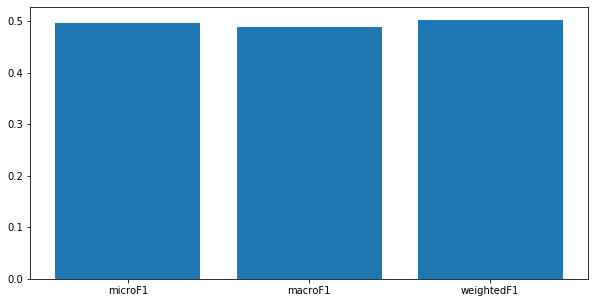

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_constant_0

none     : (array([0.60680666, 0.        ]), array([1., 0.]), array([0.75529518, 0.        ]), array([838, 543]))
micro    : (0.6068066618392469, 0.6068066618392469, 0.6068066618392469, None)
macro    : (0.30340333091962346, 0.5, 0.3776475890040559, None)
weighted : (0.36821432485249017, 0.6068066618392469, 0.4583181456703821, None)

              precision    recall  f1-score   support

           1       0.61      1.00      0.76       838
           0       0.00      0.00      0.00       543

    accuracy                           0.61      1381
   macro avg       0.30      0.50      0.38      1381
weighted avg       0.37      0.61      0.46      1381




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


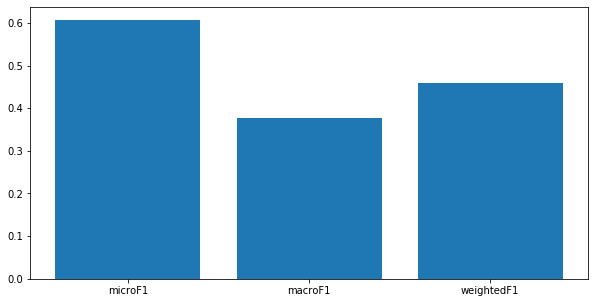

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_constant_1

none     : (array([0.        , 0.39319334]), array([0., 1.]), array([0.        , 0.56444906]), array([838, 543]))
micro    : (0.3931933381607531, 0.3931933381607531, 0.3931933381607531, None)
macro    : (0.19659666908037654, 0.5, 0.2822245322245322, None)
weighted : (0.1546010011739963, 0.3931933381607531, 0.22193761187244165, None)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       838
           0       0.39      1.00      0.56       543

    accuracy                           0.39      1381
   macro avg       0.20      0.50      0.28      1381
weighted avg       0.15      0.39      0.22      1381




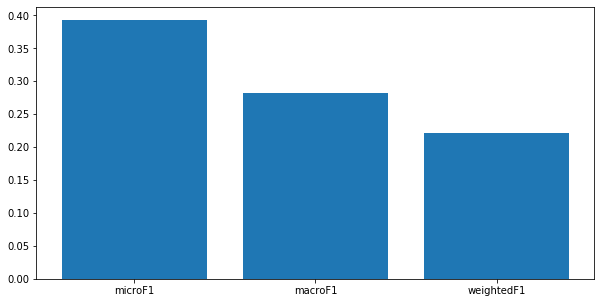

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_most_frequent

none     : (array([0.60680666, 0.        ]), array([1., 0.]), array([0.75529518, 0.        ]), array([838, 543]))
micro    : (0.6068066618392469, 0.6068066618392469, 0.6068066618392469, None)
macro    : (0.30340333091962346, 0.5, 0.3776475890040559, None)
weighted : (0.36821432485249017, 0.6068066618392469, 0.4583181456703821, None)

              precision    recall  f1-score   support

           1       0.61      1.00      0.76       838
           0       0.00      0.00      0.00       543

    accuracy                           0.61      1381
   macro avg       0.30      0.50      0.38      1381
weighted avg       0.37      0.61      0.46      1381




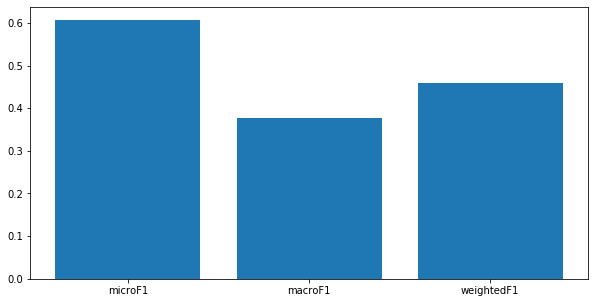

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------

dc_stratified

none     : (array([0.6       , 0.38309353]), array([0.59069212, 0.39226519]), array([0.59530968, 0.38762511]), array([838, 543]))
micro    : (0.5126719768283853, 0.5126719768283853, 0.5126719768283853, None)
macro    : (0.491546762589928, 0.49147865873758884, 0.49146739751931046, None)
weighted : (0.5147138190967863, 0.5126719768283853, 0.5136494928958248, None)

              precision    recall  f1-score   support

           1       0.60      0.59      0.60       838
           0       0.38      0.39      0.39       543

    accuracy                           0.51      1381
   macro avg       0.49      0.49      0.49      1381
weighted avg       0.51      0.51      0.51      1381




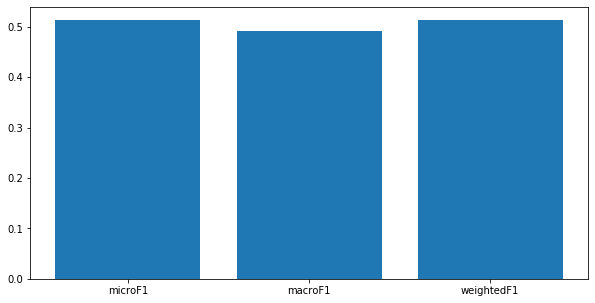

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [285]:
for i in predictions:
    print_precision_recall_fscore_support(i, test_labels, predictions[i], label_names)

In [286]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.00037169456481933594}
{'Dummy': 0.00037169456481933594}


In [287]:
#There is no point of optimizing the dummy classifier, so we will take as optimized the default value again
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['Dummy'] = report_dict['macro avg']['f1-score']
f1_macro_optimized['Dummy'] = report_dict['macro avg']['f1-score']

f1_micro_default['Dummy'] = report_dict['accuracy']
f1_micro_optimized['Dummy'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.49146739751931046}
{'Dummy': 0.5126719768283853}


### Gaussian Naive Bayes Classifier

In [288]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

# κάνουμε εκπαίδευση (fit) δηλαδή ουσιαστικά υπολογίζουμε μέση τιμή και διακύμανση για όλα τα χαρακτηριστικά και κλάσεις στο training set
start_time = time.time()
model = gnb.fit(train, train_labels)
train_time = (time.time() - start_time)

train_time_default['GaussianNB'] = train_time

start_time = time.time()
preds = gnb.predict(test)
train_time = (time.time() - start_time)

predict_time_default['GaussianNB'] = train_time

# η GaussianNB έχει builtin μέθοδο υπολογισμό accuracy. Αποθηκεύουμε την τιμή της στον πίνακά μας με τα αποτελέσματα από τα άλλα classifiers
spambase_accuracy['gaussian naive bayes'] = gnb.score(test, test_labels)

# και ξανατυπώνουμε τα sorted αποτελέσματα
print("Classification Accuracy on the Spambase Dataset (30% test set)\n")

sorted_accuracy = [(k, spambase_accuracy[k]) for k in sorted(spambase_accuracy, key=spambase_accuracy.get, reverse=True)]
for k, v in sorted_accuracy:
    print(k,v)

Classification Accuracy on the Spambase Dataset (30% test set)

gaussian naive bayes 0.8305575669804489
constant 0 0.6068066618392469
most frequent label 0.6068066618392469
stratified 0.5126719768283853
uniform (random) 0.49674149167270093
constant 1 0.3931933381607531


In [289]:
# Compute confusion matrix
pred = gnb.predict(test)
print("Confusion matrix\n")
cnf_matrix = confusion_matrix(test_labels, pred)
print("Gaussian Naive Bayes")
print(cnf_matrix, end='\n\n')

Confusion matrix

Gaussian Naive Bayes
[[623 215]
 [ 19 524]]



GaussianNB

none     : (array([0.97040498, 0.70906631]), array([0.74343675, 0.96500921]), array([0.84189189, 0.8174727 ]), array([838, 543]))
micro    : (0.8305575669804489, 0.8305575669804489, 0.8305575669804489, None)
macro    : (0.839735645121175, 0.8542229811398708, 0.8296822953999241, None)
weighted : (0.8676483569924551, 0.8305575669804489, 0.8322904278873465, None)

              precision    recall  f1-score   support

           1       0.97      0.74      0.84       838
           0       0.71      0.97      0.82       543

    accuracy                           0.83      1381
   macro avg       0.84      0.85      0.83      1381
weighted avg       0.87      0.83      0.83      1381




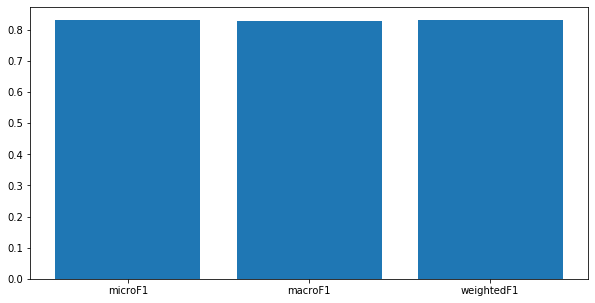

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [290]:
print_precision_recall_fscore_support("GaussianNB", test_labels, pred, label_names)

In [291]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.00037169456481933594, 'GaussianNB': 0.004476785659790039}
{'Dummy': 0.00037169456481933594, 'GaussianNB': 0.0015339851379394531}


In [292]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['GaussianNB'] = report_dict['macro avg']['f1-score']
f1_micro_default['GaussianNB'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.49146739751931046, 'GaussianNB': 0.8296822953999241}
{'Dummy': 0.5126719768283853, 'GaussianNB': 0.8305575669804489}


Here we can see that we have much greater results than the Dummy Classifier, reaching a quite good f1-score.
Moreover, as expected, it is visible that the f1-macro and f1-micro scores are quite similar, beacause our classes are more or less equally distributed.

Let's see if we can achieve better results with the kNN Classifier.

### k Nearest Neighbors Classifier (kNN)

In [293]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()

start_time = time.time()
knn.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_default['kNN'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
pred = knn.predict(test)
total_time = (time.time() - start_time)

predict_time_default['kNN'] = total_time

cnf_matrix = confusion_matrix(test_labels, pred)

print(cnf_matrix)

Fit done in: 0.025303125381469727 seconds
[[714 124]
 [154 389]]


KNeighborsClassifier

none     : (array([0.82258065, 0.7582846 ]), array([0.85202864, 0.71639042]), array([0.83704572, 0.73674242]), array([838, 543]))
micro    : (0.7986965966690803, 0.7986965966690803, 0.7986965966690802, None)
macro    : (0.7904326227755769, 0.7842095315954412, 0.786894072613592, None)
weighted : (0.7972998686870799, 0.7986965966690803, 0.7976071329101122, None)

              precision    recall  f1-score   support

           1       0.82      0.85      0.84       838
           0       0.76      0.72      0.74       543

    accuracy                           0.80      1381
   macro avg       0.79      0.78      0.79      1381
weighted avg       0.80      0.80      0.80      1381




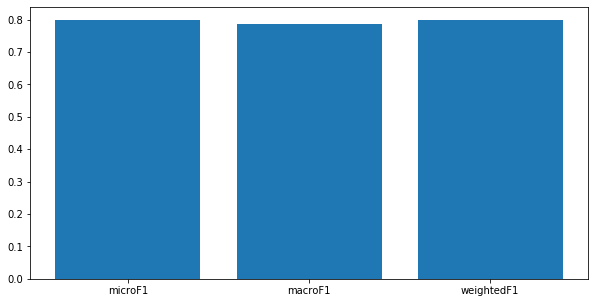

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [294]:
print_precision_recall_fscore_support("KNeighborsClassifier", test_labels, pred, label_names)

In [296]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.00037169456481933594, 'GaussianNB': 0.004476785659790039, 'kNN': 0.025303125381469727}
{'Dummy': 0.00037169456481933594, 'GaussianNB': 0.0015339851379394531, 'kNN': 0.08151006698608398}


In [295]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['kNN'] = report_dict['macro avg']['f1-score']
f1_micro_default['kNN'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.49146739751931046, 'GaussianNB': 0.8296822953999241, 'kNN': 0.8296822953999241}
{'Dummy': 0.5126719768283853, 'GaussianNB': 0.8305575669804489, 'kNN': 0.8305575669804489}


kNN does not give us better results than the Gaussian NB in this dataset.

### Multi-Layer Perceptron (MLP) Classifier

In [297]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5,), random_state=1)

start_time = time.time()
clf.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_default['MLPClassifier'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
preds = clf.predict(test)
total_time = (time.time() - start_time)

predict_time_default['MLPClassifier'] = total_time

Fit done in: 0.01615309715270996 seconds


In [298]:
# Compute confusion matrix
pred = clf.predict(test)
print("Confusion matrix\n")
cnf_matrix = confusion_matrix(test_labels, pred)
print("MLP Classifier")
print(cnf_matrix, end='\n\n')

Confusion matrix

MLP Classifier
[[838   0]
 [543   0]]



MLPClassifier

none     : (array([0.60680666, 0.        ]), array([1., 0.]), array([0.75529518, 0.        ]), array([838, 543]))
micro    : (0.6068066618392469, 0.6068066618392469, 0.6068066618392469, None)
macro    : (0.30340333091962346, 0.5, 0.3776475890040559, None)
weighted : (0.36821432485249017, 0.6068066618392469, 0.4583181456703821, None)

              precision    recall  f1-score   support

           1       0.61      1.00      0.76       838
           0       0.00      0.00      0.00       543

    accuracy                           0.61      1381
   macro avg       0.30      0.50      0.38      1381
weighted avg       0.37      0.61      0.46      1381




/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


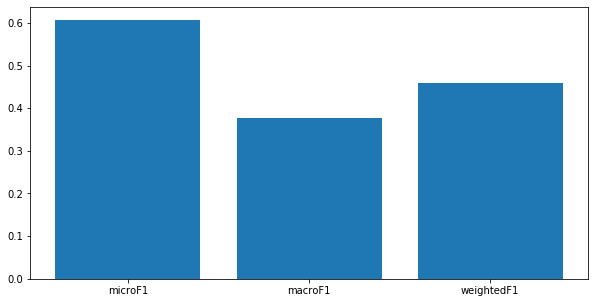

---------------------------------------------------------------------------------------------------------------------
---------------------------------------------------------------------------------------------------------------------



In [299]:
print_precision_recall_fscore_support("MLPClassifier", test_labels, pred, label_names)

In [300]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.00037169456481933594, 'GaussianNB': 0.004476785659790039, 'kNN': 0.025303125381469727, 'MLPClassifier': 0.01615309715270996}
{'Dummy': 0.00037169456481933594, 'GaussianNB': 0.0015339851379394531, 'kNN': 0.08151006698608398, 'MLPClassifier': 0.0013630390167236328}


In [301]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_default['MLPClassifier'] = report_dict['macro avg']['f1-score']
f1_micro_default['MLPClassifier'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_micro_default)

{'Dummy': 0.49146739751931046, 'GaussianNB': 0.8296822953999241, 'kNN': 0.8296822953999241, 'MLPClassifier': 0.3776475890040559}
{'Dummy': 0.5126719768283853, 'GaussianNB': 0.8305575669804489, 'kNN': 0.8305575669804489, 'MLPClassifier': 0.6068066618392469}


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


The MLP Classifier produces even worse score than the others. This is because no data preprocessing has been conducted and the hyperparameters are not optimized (MLP has a great amount of hyperparameters).

# Section D: Optimizing Classifiers

### Balance Dataset - Oversampling

In [302]:
sampler = SMOTE()
train, train_labels = sampler.fit_sample(np_samples, np_labels)

# print length of train set to validate oversampling
print("Length of train_set is =", len(train), '\n')

Length of train_set is = 5576 



**Q8**: Our samples are **ordered tuples** since each number corresponds to a specific attribute.

### Variance Threshold

We check the variance of each feature in our train dataset in order to understand what values to try as threshold.

#### Pre-Processing

In [303]:
train_Var = np.var(train, axis=0)
print(train_Var)

[8.97119733e-02 1.39547009e+00 2.43954992e-01 1.84098623e+00
 4.48079926e-01 7.62887153e-02 1.70767985e-01 1.67840097e-01
 8.40817919e-02 4.01208868e-01 4.19622891e-02 6.59222352e-01
 9.15109022e-02 1.08874652e-01 7.65797881e-02 7.13258444e-01
 2.18533075e-01 3.04190390e-01 2.92996322e+00 2.64360794e-01
 1.39577609e+00 1.04065091e+00 1.39323805e-01 2.02012218e-01
 2.34739778e+00 6.59642629e-01 9.43847827e+00 2.41968416e-01
 2.91821242e-01 1.73884740e-01 1.34947776e-01 8.93750285e-02
 2.56745779e-01 8.99425893e-02 2.36397507e-01 1.37650903e-01
 1.55826677e-01 4.03746564e-02 1.57148294e-01 1.03635647e-01
 1.07907222e-01 4.87598796e-01 4.17466548e-02 3.20188559e-01
 8.62117161e-01 6.90976374e-01 4.82856715e-03 6.75111036e-02
 5.05948022e-02 6.26250717e-02 1.02796997e-02 6.40133198e-01
 6.71418226e-02 1.60040797e-01 1.26131042e+03 3.78377867e+04
 4.19680420e+05]


In [304]:
from sklearn.feature_selection import VarianceThreshold

# initialize the selector
selector = VarianceThreshold(0)
# fit the selector in the data
train_reduced = selector.fit_transform(train)
print(train.shape)
print(train_reduced.shape)

(5576, 57)
(5576, 57)


In [305]:
selector = VarianceThreshold(0.05)

train_reduced = selector.fit_transform(train)
print(train_reduced)

mask = selector.get_support()
print(mask)

print(train.shape)
print(train_reduced.shape)

[[0.00000000e+00 6.40000000e-01 6.40000000e-01 ... 3.75600000e+00
  6.10000000e+01 2.78000000e+02]
 [2.10000000e-01 2.80000000e-01 5.00000000e-01 ... 5.11400000e+00
  1.01000000e+02 1.02800000e+03]
 [6.00000000e-02 0.00000000e+00 7.10000000e-01 ... 9.82100000e+00
  4.85000000e+02 2.25900000e+03]
 ...
 [4.40000000e-01 0.00000000e+00 0.00000000e+00 ... 2.42800000e+00
  2.80000000e+01 1.53000000e+02]
 [0.00000000e+00 2.84549703e-01 9.32682006e-01 ... 7.56665612e+00
  1.89434388e+02 5.34136976e+02]
 [1.38569352e-01 2.90510946e-01 4.42554729e-01 ... 6.59956790e+00
  2.16305114e+02 8.98449632e+02]]
[ True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True False  True  True  True False  True
  True  True False  True  True  True  True  True  True]
(5576, 57)
(5576, 52)


In [306]:
selector = VarianceThreshold(0.2)

train_reduced = selector.fit_transform(train)
print(train.shape)
print(train_reduced.shape)

(5576, 57)
(5576, 29)


It's clear that we should definetly choose a value below 0.05 because the features are reduced a lot and we will probably have a significant loss of information.

### Dummy Classifier

In [307]:
dc_stratified = DummyClassifier(strategy="stratified")

start_time = time.time()
model = dc_stratified.fit(train, train_labels)
train_time = (time.time() - start_time)

train_time_default['Dummy'] = train_time
train_time_optimized['Dummy'] = train_time

start_time = time.time()
preds = dc_stratified.predict(test)
pred_time = (time.time() - start_time)

predict_time_default['Dummy'] = train_time
predict_time_optimized['Dummy'] = train_time


print (classification_report(test_labels, preds))

              precision    recall  f1-score   support

           0       0.60      0.48      0.53       838
           1       0.38      0.49      0.43       543

    accuracy                           0.49      1381
   macro avg       0.49      0.49      0.48      1381
weighted avg       0.51      0.49      0.49      1381



In [308]:
print(train_time_default)
print(predict_time_default)

{'Dummy': 0.001230001449584961, 'GaussianNB': 0.004476785659790039, 'kNN': 0.025303125381469727, 'MLPClassifier': 0.01615309715270996}
{'Dummy': 0.001230001449584961, 'GaussianNB': 0.0015339851379394531, 'kNN': 0.08151006698608398, 'MLPClassifier': 0.0013630390167236328}


We can see, that with the DummyClassifier, we can't achieve good results. So, we will move on and try the Naive Bayes Classifier.

### Optimized Gaussian Naive Bayes Classifier

#### Data Processing

In [0]:
from imblearn.pipeline import Pipeline

# import the known classes for preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

# initialize the estimators (transformers and classifier) without parameters
selector = VarianceThreshold()
clf = GaussianNB()

vthreshold = [0, 0.01, 0.02, 0.03, 0.04, 0.05] #according to the calculations we did in the beginning of this section

In [0]:
pipe = Pipeline(steps=[('selector', selector), ('gaussiannb', clf)], memory = 'tmp')

# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold), cv=5, scoring='f1_micro', n_jobs=-1)

In [311]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)/60
print("Fit done in:",total_time,"minutes")

preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fit done in: 0.0689507246017456 minutes
              precision    recall  f1-score   support

           0       0.97      0.75      0.84       838
           1       0.71      0.97      0.82       543

    accuracy                           0.83      1381
   macro avg       0.84      0.86      0.83      1381
weighted avg       0.87      0.83      0.84      1381



In [312]:
print (estimator.best_estimator_)
print (estimator.best_params_)
print()
print(train.shape)
print(train_reduced.shape)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.04)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
{'selector__threshold': 0.04}

(5576, 57)
(5576, 29)


We see that we get the best results for the Variance Threshold 0.04. We do not have many features compared to the number of samples, so we will stop here.

We will try to optimize it with PCA, too.

In [0]:
# initialize the estimators (transformers and classifier) without parameters
selector =VarianceThreshold()
pca = PCA()
clf = GaussianNB()

vthreshold = [0.04]
n_components = [31,32,33,34,35,36,37]

In [0]:
pipe = Pipeline(steps=[('selector', selector),('pca',pca), ('gaussiannb', clf)], memory = 'tmp')

# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, pca__n_components=n_components), cv=5, scoring='f1_micro', n_jobs=-1)

In [315]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)/60

train_time_optimized['GaussianNB'] = total_time
print("Fit done in:",total_time,"seconds")

start_time = time.time()
preds = estimator.predict(test)
total_time = (time.time() - start_time)

predict_time_optimized['GaussianNB'] = total_time

print (classification_report(test_labels, preds))

Fit done in: 0.030338768164316812 seconds
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       838
           1       0.84      0.76      0.80       543

    accuracy                           0.85      1381
   macro avg       0.85      0.83      0.84      1381
weighted avg       0.85      0.85      0.85      1381



In [316]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.04)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=33,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('gaussiannb', GaussianNB(priors=None, var_smoothing=1e-09))],
         verbose=False)
{'pca__n_components': 33, 'selector__threshold': 0.04}


We have less dimensions here and we get higher results when we try to optimize with PCA. Therefore, **our best score here is by using as Variance Threshold 0.04 and PCA**.

It is also important to note that the PCA values used here, were chosen after experiments in greater values. For example, we tried to keep 50 dimensions but the best results using PCA was around 32 dimensions.

In [317]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_optimized['GaussianNB'] = report_dict['macro avg']['f1-score']
f1_micro_optimized['GaussianNB'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_macro_optimized)
print(f1_micro_default)
print(f1_micro_optimized)

{'Dummy': 0.49146739751931046, 'GaussianNB': 0.8296822953999241, 'kNN': 0.8296822953999241, 'MLPClassifier': 0.3776475890040559}
{'Dummy': 0.49146739751931046, 'GaussianNB': 0.8375621723349912}
{'Dummy': 0.5126719768283853, 'GaussianNB': 0.8305575669804489, 'kNN': 0.8305575669804489, 'MLPClassifier': 0.6068066618392469}
{'Dummy': 0.5126719768283853, 'GaussianNB': 0.8479362780593772}


In [318]:
print(train_time_default)
print(predict_time_default)
print(train_time_optimized)
print(predict_time_optimized)

{'Dummy': 0.001230001449584961, 'GaussianNB': 0.004476785659790039, 'kNN': 0.025303125381469727, 'MLPClassifier': 0.01615309715270996}
{'Dummy': 0.001230001449584961, 'GaussianNB': 0.0015339851379394531, 'kNN': 0.08151006698608398, 'MLPClassifier': 0.0013630390167236328}
{'Dummy': 0.001230001449584961, 'GaussianNB': 0.030338768164316812}
{'Dummy': 0.001230001449584961, 'GaussianNB': 0.0026972293853759766}


### Optimized kNN Classifier

We will first try only with the Variance Threshold.
We will use n_jobs=-1 so that all the cores of our machine will be used and verbose=10, for checking how the training is progressing.

In [0]:
from imblearn.pipeline import Pipeline

# φέρνουμε τις γνωστές μας κλάσεις για preprocessing
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# αρχικοποιούμε τους εκτιμητές (μετασχηματιστές και ταξινομητή) χωρείς παραμέτρους
selector = VarianceThreshold()
# scaler = StandardScaler()
# pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

vthreshold = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
k = [1, 2, 3, 5, 10, 15]

weights_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'] #default minkowski

In [0]:
pipe = Pipeline(steps=[('selector', selector), ('kNN', clf)], memory = 'tmp')

# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k, kNN__weights=weights_options, kNN__metric=metric_options), cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [321]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)
print("Fit done in:",total_time/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.9s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.2s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    3.8s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    9.4s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

Fit done in: 5.653944253921509 minutes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       543

    accuracy                           1.00      1381
   macro avg       1.00      1.00      1.00      1381
weighted avg       1.00      1.00      1.00      1381



[Parallel(n_jobs=-1)]: Done 1800 out of 1800 | elapsed:  5.7min finished


In [323]:
print(estimator.best_estimator_)
print(estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.05)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=-1, n_neighbors=1, p=2,
                                      weights='uniform'))],
         verbose=False)
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 1, 'kNN__weights': 'uniform', 'selector__threshold': 0.05}


In [0]:
# We check if PCA would improve our score

selector =VarianceThreshold()
pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1)

vthreshold = [0.05]
n_components = [30, 32, 38, 40, 42, 44, 45]
k = [1,2,3,4,5]

weights_options = ['distance']
metric_options = ['manhattan'] #default minkowski

In [0]:
pipe = Pipeline(steps=[('selector', selector),('pca',pca), ('kNN', clf)], memory = 'tmp')

# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k, pca__n_components=n_components, kNN__weights=weights_options, kNN__metric=metric_options), cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)


In [326]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = time.time() - start_time
print("Fit done in:",total_time/60,"minutes")
preds = estimator.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.0s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    2.9s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    4.3s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:    6.7s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:    7.6s
[Parallel(n_jobs=-1)]: Done 109 tasks      | elapsed:    8.7s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:   

Fit done in: 0.22316103378931682 minutes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       543

    accuracy                           1.00      1381
   macro avg       1.00      1.00      1.00      1381
weighted avg       1.00      1.00      1.00      1381



[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:   13.3s finished


In [327]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.05)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=44,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=-1, n_neighbors=1, p=2,
                                      weights='distance'))],
         verbose=False)
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 1, 'kNN__weights': 'distance', 'pca__n_components': 44, 'selector__threshold': 0.05}


In [0]:
# We try also with the StandardScaler

selector = VarianceThreshold()
scaler = StandardScaler()
#pca = PCA()
clf = KNeighborsClassifier(n_jobs=-1) # η παράμετρος n_jobs = 1 χρησιμοποιεί όλους τους πυρήνες του υπολογιστή

vthreshold = [0.05, 0.06, 0.07, 0.08, 0.09, 0.1]
k = [1, 2, 3, 5, 10, 15]

weights_options = ['uniform', 'distance']
metric_options = ['euclidean', 'manhattan', 'chebyshev', 'minkowski', 'hamming'] #default minkowski

In [0]:
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('kNN', clf)], memory = 'tmp')

# We will use 5 fold validation
estimator = GridSearchCV(pipe, dict(selector__threshold=vthreshold, kNN__n_neighbors=k, kNN__weights=weights_options, kNN__metric=metric_options), cv=5, scoring='f1_micro', n_jobs=-1)

In [330]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = time.time() - start_time

train_time_optimized['kNN'] = total_time

print("Fit done in:",(time.time() - start_time)/60,"minutes")

start_time = time.time()
preds = estimator.predict(test)
total_time = (time.time() - start_time)

predict_time_optimized['kNN'] = total_time

print (classification_report(test_labels, preds))

Fit done in: 10.177128970623016 minutes
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       543

    accuracy                           1.00      1381
   macro avg       1.00      1.00      1.00      1381
weighted avg       1.00      1.00      1.00      1381



In [331]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.05)),
                ('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('kNN',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='manhattan', metric_params=None,
                                      n_jobs=-1, n_neighbors=10, p=2,
                                      weights='distance'))],
         verbose=False)
{'kNN__metric': 'manhattan', 'kNN__n_neighbors': 10, 'kNN__weights': 'distance', 'selector__threshold': 0.05}


In [332]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_optimized['kNN'] = report_dict['macro avg']['f1-score']
f1_micro_optimized['kNN'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_macro_optimized)
print(f1_micro_default)
print(f1_micro_optimized)

{'Dummy': 0.49146739751931046, 'GaussianNB': 0.8296822953999241, 'kNN': 0.8296822953999241, 'MLPClassifier': 0.3776475890040559}
{'Dummy': 0.49146739751931046, 'GaussianNB': 0.8375621723349912, 'kNN': 1.0}
{'Dummy': 0.5126719768283853, 'GaussianNB': 0.8305575669804489, 'kNN': 0.8305575669804489, 'MLPClassifier': 0.6068066618392469}
{'Dummy': 0.5126719768283853, 'GaussianNB': 0.8479362780593772, 'kNN': 1.0}


In [333]:
print(train_time_default)
print(predict_time_default)
print(train_time_optimized)
print(predict_time_optimized)

{'Dummy': 0.001230001449584961, 'GaussianNB': 0.004476785659790039, 'kNN': 0.025303125381469727, 'MLPClassifier': 0.01615309715270996}
{'Dummy': 0.001230001449584961, 'GaussianNB': 0.0015339851379394531, 'kNN': 0.08151006698608398, 'MLPClassifier': 0.0013630390167236328}
{'Dummy': 0.001230001449584961, 'GaussianNB': 0.030338768164316812, 'kNN': 610.6276812553406}
{'Dummy': 0.001230001449584961, 'GaussianNB': 0.0026972293853759766, 'kNN': 0.5042533874511719}


### Optimized MLP Classifier

At first we will not use the Variance Threshold.

In [0]:
## Parameters to optimize
parameter_space = {
    #'hidden_layer_sizes': [(5,) , (15,) , (20,) , (50,) , (100,)], # tuple default (100,).The ith element represents the number of neurons in the ith hidden layer.
    'activation': ['identity', 'logistic', 'tanh', 'relu'], # default ‘relu’
    'solver': ['lbfgs','sgd','adam'], # default ‘adam’
    #'learning_rate': ['constant','invscaling','adaptive'] # Only used when solver='sgd'.
    #'max_iter': [100,150,200,250],
    #'alpha': [0.0001, 0.002, 0.05] 
}

We will first try to see whch solver with which activation gives us the best result.

In [0]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier()
clf = GridSearchCV(mlp, parameter_space, n_jobs=-1, cv=5, scoring='f1_micro', verbose=10)

In [336]:
start_time = time.time()
clf.fit(train, train_labels)
print("Fit done in:",(time.time() - start_time)/60,"minutes")
preds = clf.predict(test)
print (classification_report(test_labels, preds))

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    0.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    4.2s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   26.7s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   46.6s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed:  1.6min finished


Fit done in: 1.6942705829938254 minutes
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       838
           1       0.95      0.96      0.95       543

    accuracy                           0.96      1381
   macro avg       0.96      0.96      0.96      1381
weighted avg       0.96      0.96      0.96      1381



In [337]:
print (clf.best_params_)

{'activation': 'tanh', 'solver': 'adam'}


Since that didn 't take much time, we will check again if we can get any better results by using the Variance Threshold.

In [0]:
selector =VarianceThreshold()
clf = MLPClassifier()

param_grid = {
    'selector__threshold': [0,0.001, 0.002, 0.003, 0.004],
    'mlpclassifier__activation': ['tanh'],
    'mlpclassifier__solver': ['adam']
}

In [0]:
pipe = Pipeline(steps=[('selector', selector), ('mlpclassifier', clf)], memory = 'tmp')

In [0]:
# We will use 5 fold validation
estimator = GridSearchCV(pipe, param_grid=param_grid, cv=5, scoring='f1_micro', n_jobs=-1, verbose=10)

In [341]:
start_time = time.time()
estimator.fit(train, train_labels)
total_time = (time.time() - start_time)

train_time_optimized['MLPClassifier'] = total_time
print("Fit done in:",(time.time() - start_time)/60,"minutes")

start_time = time.time()
preds = estimator.predict(test)
total_time = (time.time() - start_time)

predict_time_optimized['MLPClassifier'] = total_time

print (classification_report(test_labels, preds))

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   28.3s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   41.3s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed:  1.3min finished


Fit done in: 1.4385800083478293 minutes
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       838
           1       0.98      0.97      0.97       543

    accuracy                           0.98      1381
   macro avg       0.98      0.98      0.98      1381
weighted avg       0.98      0.98      0.98      1381



In [342]:
print (estimator.best_estimator_)
print (estimator.best_params_)

Pipeline(memory='tmp',
         steps=[('selector', VarianceThreshold(threshold=0.003)),
                ('mlpclassifier',
                 MLPClassifier(activation='tanh', alpha=0.0001,
                               batch_size='auto', beta_1=0.9, beta_2=0.999,
                               early_stopping=False, epsilon=1e-08,
                               hidden_layer_sizes=(100,),
                               learning_rate='constant',
                               learning_rate_init=0.001, max_fun=15000,
                               max_iter=200, momentum=0.9, n_iter_no_change=10,
                               nesterovs_momentum=True, power_t=0.5,
                               random_state=None, shuffle=True, solver='adam',
                               tol=0.0001, validation_fraction=0.1,
                               verbose=False, warm_start=False))],
         verbose=False)
{'mlpclassifier__activation': 'tanh', 'mlpclassifier__solver': 'adam', 'selector__threshold': 0

Having run multiple versions of the hyperparameters, clearly the solver that gives the best results in our case is *Adam* with threshold 0.002.

In [343]:
report_dict = classification_report(test_labels, preds, output_dict = True)
f1_macro_optimized['MLPClassifier'] = report_dict['macro avg']['f1-score']
f1_micro_optimized['MLPClassifier'] = report_dict['accuracy']

print(f1_macro_default)
print(f1_macro_optimized)
print(f1_micro_default)
print(f1_micro_optimized)

{'Dummy': 0.49146739751931046, 'GaussianNB': 0.8296822953999241, 'kNN': 0.8296822953999241, 'MLPClassifier': 0.3776475890040559}
{'Dummy': 0.49146739751931046, 'GaussianNB': 0.8375621723349912, 'kNN': 1.0, 'MLPClassifier': 0.9779606760215522}
{'Dummy': 0.5126719768283853, 'GaussianNB': 0.8305575669804489, 'kNN': 0.8305575669804489, 'MLPClassifier': 0.6068066618392469}
{'Dummy': 0.5126719768283853, 'GaussianNB': 0.8479362780593772, 'kNN': 1.0, 'MLPClassifier': 0.9790007241129616}


In [344]:
print(train_time_default)
print(predict_time_default)
print(train_time_optimized)
print(predict_time_optimized)

{'Dummy': 0.001230001449584961, 'GaussianNB': 0.004476785659790039, 'kNN': 0.025303125381469727, 'MLPClassifier': 0.01615309715270996}
{'Dummy': 0.001230001449584961, 'GaussianNB': 0.0015339851379394531, 'kNN': 0.08151006698608398, 'MLPClassifier': 0.0013630390167236328}
{'Dummy': 0.001230001449584961, 'GaussianNB': 0.030338768164316812, 'kNN': 610.6276812553406, 'MLPClassifier': 86.31468176841736}
{'Dummy': 0.001230001449584961, 'GaussianNB': 0.0026972293853759766, 'kNN': 0.5042533874511719, 'MLPClassifier': 0.007341861724853516}


### Final Results & Comparisons

Since, we have run and taken all the metrics we need from multiple Classifiers, we can now plot them and compare them.

In [345]:
times = [train_time_default, train_time_optimized]
print("Train time in (s):")
pd.DataFrame(times, index=['default', 'optimized'])

Train time in (s):


,Dummy,GaussianNB,kNN,MLPClassifier
default,0.00123,0.004477,0.025303,0.016153
optimized,0.00123,0.030339,610.627681,86.314682


In [346]:
times = [predict_time_default, predict_time_optimized]
print("Predict time in (s):")
pd.DataFrame(times, index=['default', 'optimized'])

Predict time in (s):


,Dummy,GaussianNB,kNN,MLPClassifier
default,0.00123,0.001534,0.081510,0.001363
optimized,0.00123,0.002697,0.504253,0.007342


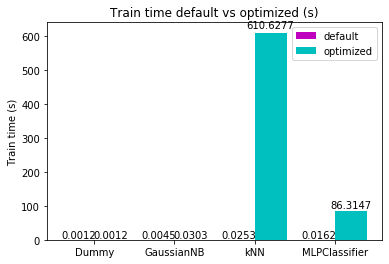

In [347]:
import matplotlib.pyplot as plt

N = 4
time_default = list(train_time_default.values())

ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, time_default, width, color='m')

time_optimized = time_optimized = list(train_time_optimized.values())

rects2 = ax.bar(ind + width, time_optimized, width, color='c')

# add some text for labels, title and axes ticks
ax.set_ylabel('Train time (s)')
ax.set_title('Train time default vs optimized (s)')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(train_time_default.keys()))

ax.legend((rects1[0], rects2[0]), ('default', 'optimized'))

# Turn on the grid
#ax.minorticks_on()
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                "{:.4f}".format(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [348]:
f1_scores = [f1_micro_default, f1_micro_optimized]
print("F1 micro scores:")
pd.DataFrame(f1_scores, index=['default', 'optimized'])

F1 micro scores:


,Dummy,GaussianNB,kNN,MLPClassifier
default,0.512672,0.830558,0.830558,0.606807
optimized,0.512672,0.847936,1.000000,0.979001


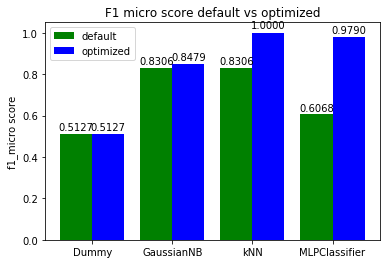

In [349]:
N = 4
f1_default = list(f1_micro_default.values())

ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, f1_default, width, color='g')

f1_optimized = time_optimized = list(f1_micro_optimized.values())

rects2 = ax.bar(ind + width, f1_optimized, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('f1_micro score')
ax.set_title('F1 micro score default vs optimized')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(f1_micro_default.keys()))

ax.legend((rects1[0], rects2[0]), ('default', 'optimized'))

# Turn on the grid
#ax.minorticks_on()
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                "{:.4f}".format(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()

In [350]:
f1_scores = [f1_macro_default, f1_macro_optimized]
print("F1 macro scores:")
pd.DataFrame(f1_scores, index=['default', 'optimized'])

F1 macro scores:


,Dummy,GaussianNB,kNN,MLPClassifier
default,0.491467,0.829682,0.829682,0.377648
optimized,0.491467,0.837562,1.000000,0.977961


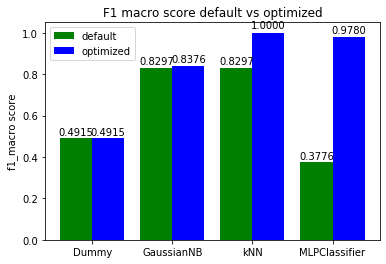

In [351]:
N = 4
f1_default = list(f1_macro_default.values())

ind = np.arange(N)  # the x locations for the groups
width = 0.4       # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(ind, f1_default, width, color='g')

f1_optimized = time_optimized = list(f1_macro_optimized.values())

rects2 = ax.bar(ind + width, f1_optimized, width, color='b')

# add some text for labels, title and axes ticks
ax.set_ylabel('f1_macro score')
ax.set_title('F1 macro score default vs optimized')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(list(f1_macro_default.keys()))

ax.legend((rects1[0], rects2[0]), ('default', 'optimized'))

# Turn on the grid
#ax.minorticks_on()
#ax.grid(which='major', linestyle='-', linewidth='0.5', color='red')
# Customize the minor grid
#ax.grid(which='minor', linestyle=':', linewidth='0.5', color='black')

def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.01*height,
                "{:.4f}".format(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show()